<a href="https://colab.research.google.com/github/hongwon2/HG-MLDL/blob/main/4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **chapter04 다양한 분류 알고리즘**

## **04-1 로지스틱 회귀**


럭키백의 확률을 계산하라!

In [1]:
import pandas as pd

fish = pd.read_csv('http://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


**데이터 프레임이란**

2차원 형식의 주요 데이터 구조

넘파이,사이킷런과 호환 굿

In [2]:
print(pd.unique(fish['Species'])) #시리즈 열에서 고유값 추출 - pd.unique()

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
#fish_input = fish['Weight'].to_numpy() #값이 한 배열에 다 들어감
#fish_input = fish['Weight','Length'].to_numpy() #같은 배열에 들어 갈 수없음 한 열만 가능
#fish_input = fish[['Weight','Length']] - 데이터 프레임 형식이니까 넘파이로 바꿔야함
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()



In [4]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
fish_target = fish['Species'].to_numpy() # 넘파이 배열로 바꾸어 fish_target에 저장

In [6]:
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [7]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(fish_input,fish_target,random_state = 42)  

In [8]:
# 훈련세트와 테스트 세트를 표준화 전처리하기 - 이부분 잘 모르니 연습하기
#'Weight','Length','Diagonal','Height','Width' 모두 크기가 다르니까 맞춰줘야지 
# 표준점수로 훈련세트 스케일링 하고(fit),transfrom으로 변환해라 - 인풋데이터
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


k-최근접 이웃 분류기의 확률 예측

데이터 준비,스켈일링 다 끝냈다면 이제 예측할 차례!

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(train_scaled,train_target) #사실 사이킷 런은 타겟값을 자동으로 정수로 바꿔줌
print(knc.score(train_scaled,train_target))
print(knc.score(test_scaled,test_target))

0.8907563025210085
0.85


In [10]:
print(knc.classes_) # KNeighborsClassifier에서 정렬된 타깃값은 classes_속성에 저장 - 알파벳순
# 함수에 _ 는 내가 지정한게 아니라 컴퓨터가 스스로 학습하면서 정한 것

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [11]:
print(knc.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [12]:
from numpy.lib.shape_base import row_stack
import numpy as np
proba = knc.predict_proba(test_scaled[:5])
#print(knc.classes_)
#print(np.round(proba,decimals=4))
#print(row_stack([knc.classes_,proba]))
print(pd.DataFrame(np.round(proba,decimals=4),columns = knc.classes_))

   Bream  Parkki   Perch  Pike   Roach  Smelt  Whitefish
0    0.0     0.0  1.0000   0.0  0.0000    0.0        0.0
1    0.0     0.0  0.0000   0.0  0.0000    1.0        0.0
2    0.0     0.0  0.0000   1.0  0.0000    0.0        0.0
3    0.0     0.0  0.6667   0.0  0.3333    0.0        0.0
4    0.0     0.0  0.6667   0.0  0.3333    0.0        0.0


In [13]:
print(test_scaled[3:4]) # 3행 픽


[[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]]


In [14]:
distances,indexes = knc.kneighbors(test_scaled[3:4])
print(distances,indexes) # 위 행과 가장 가까운  트레인 셋 중 3개의 거리와, 3개의 인덱스번호 
#왜냐면 fit을 트레인셋에 했잖아
print(train_target[indexes]) #트레인셋 인덱스의 타겟정보

[[0.20774583 0.24862983 0.33682411]] [[104 115 106]]
[['Roach' 'Perch' 'Perch']]


로지스틱 회귀

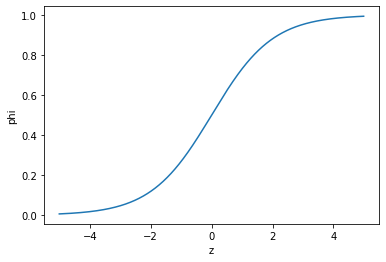

In [15]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.01)  # 0.1 간격으로 곡선을 부드럽게 하는 효과
phi = 1 / (1 + np.exp(-z)) #시그모이드 함수(=y값)
plt.plot(z , phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## **로지스틱 회귀로 이진 분류 수행하기**

이진분류인 경우 시그모이드 함수의 출력이 

'>0.5 양성클래스, <0.5 음성 클래스 

'=0.5일 경우 라이브러리마다 다르다! 사이킷런은 음성

**불리언 인덱싱(boolean indexing) = 넘파이 배열은 True, False 값**

In [16]:
#불리언 인덱싱
#예시 A C 골라내기
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [17]:
# 불리언 인덱싱으로 도미(Bream)와 빙어(Smelt)의 행만 골라내기
# 비교 결과를 비트 or 연산자(|)를 사용해 합치면 골라낼 수 있다.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
#bream과 smelt 일 경우 true, 아니면 false
#bream과 smelt를 뽑아내는 방법

In [18]:
# 도미와 빙어만 골라낸 데이터로 로지스틱 회귀 모델 훈련하기
# LogisticRegression 클래스는 선형 모델이므로 sklearn.linear_model 패키지에 존재
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [19]:
#훈련 모델로 5개 예측하기
#print(lr.classes_) 알파벳 순으로
#0번 열(음성클래스):(도미:bream_), 1번열(양성클래스):(빙어 : smelt)
#print(lr.predict_proba(train_bream_smelt[:5]))
print(pd.DataFrame(lr.predict_proba(train_bream_smelt[:5]),columns = lr.classes_))

      Bream     Smelt
0  0.997599  0.002401
1  0.027352  0.972648
2  0.994861  0.005139
3  0.985842  0.014158
4  0.997673  0.002327


In [20]:
# 선형 회귀처럼 로지스틱 회귀가 학습한 계수 확인하기
print(lr.coef_ , lr.intercept_)
# z = -0.4037798*무게-0.57620209*길이-0.66280298*대각선-1.01290277*높이-0.73168947*두께 -2.16155132


[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [21]:
# LogisticRegression 클래스는 decision_function()메서드로 z값을 출력할 수 있다!
# 처음 5개 샘플의 z 값을 출력해보자
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)


[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [22]:
# 이 z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음
# 다행히 파이썬의 사이파이(scipy) 라이브러리에도 시그모이드 함수-expit() 함수가 있음.
# np.exp()함수를 사용해 분수 계산을 하는 것보다 훨씬 편리하고 안전함
from scipy.special import expit
print(expit(decisions))
# z값을 시그모이드 함수에 집어넣고 이진분류 로지스틱회귀니까 양성(1열)만을 반환
# 출력된 값을 보면 predict_proba() 메서드 출력의 두 번째 열의 값과 동일함
# 즉, decision_function() 메서드는 양성 클래스에 대한 z 값을 반환함


[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


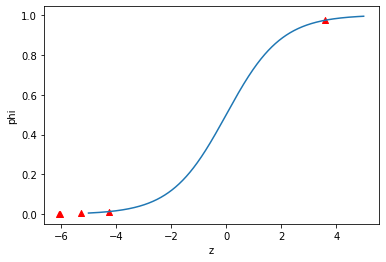

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [23]:
plt.plot(z,expit(z))
plt.scatter(decisions,expit(decisions),marker = "^",color = 'red')
plt.xlabel('z')
plt.ylabel('phi')
plt.show()
print(lr.predict(train_bream_smelt[:5]))

## **로지스틱 회귀로 다중 분류 수행하기**

이진분류와의 차이점을 알아보자

LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함.

 - max_iter 매개변수에서 반복횟수를 지정(100은 부족, 1,000으로 변경)


LogisticRegresiion은 기본적으로 릿지 회귀와 같이 계수로 제곱을 규제함

 - 이런 규제를 'L2 규제'라고 함.

 - 매개변수 C, 작을수록 규제가 커짐. C의 기본값은 1(사이킷런의 분류모델은 alpha 말고 C)

In [24]:
lr = LogisticRegression(C = 20,max_iter = 1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


0.9327731092436975
0.925


In [25]:
# 훈련 세트와 테스트 세트가 과대적합이나 과소적합이 아닌 것으로 보여짐.
# 테스트 세트의 처음 5개 샘플에 대한 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [26]:
#처음 5개 샘플에 대한 예측 확률을 출력
#반올림 시행
proba = lr.predict_proba(test_scaled[:5])
#print(np.round(proba,decimals = 3 ))
print(pd.DataFrame(np.round(proba,decimals = 3 ),columns = lr.classes_))

   Bream  Parkki  Perch   Pike  Roach  Smelt  Whitefish
0  0.000   0.014  0.841  0.000  0.136  0.007      0.003
1  0.000   0.003  0.044  0.000  0.007  0.946      0.000
2  0.000   0.000  0.034  0.935  0.015  0.016      0.000
3  0.011   0.034  0.306  0.007  0.567  0.000      0.076
4  0.000   0.000  0.904  0.002  0.089  0.002      0.001


In [27]:
# 다중 분류일 경우 선형 방정식은 어떠한 모습일까?
# coef_intercept_의 크기를 출력해보자
print(lr.coef_)
print(lr.coef_.shape)
print('---------------')
print(lr.intercept_)
print(lr.intercept_.shape)


[[-1.49002087 -1.02912886  2.59345551  7.70357682 -1.2007011 ]
 [ 0.19618235 -2.01068181 -3.77976834  6.50491489 -1.99482722]
 [ 3.56279745  6.34357182 -8.48971143 -5.75757348  3.79307308]
 [-0.10458098  3.60319431  3.93067812 -3.61736674 -1.75069691]
 [-1.40061442 -6.07503434  5.25969314 -0.87220069  1.86043659]
 [-1.38526214  1.49214574  1.39226167 -5.67734118 -4.40097523]
 [ 0.62149861 -2.32406685 -0.90660867  1.71599038  3.6936908 ]]
(7, 5)
---------------
[-0.09205179 -0.26290885  3.25101327 -0.14742956  2.65498283 -6.78782948
  1.38422358]
(7,)


In [28]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals = 2))
# 5개 특성을 사용하므로 coef_배열의 열은 5개다
# 행이 7개란 말은 이진 분류에서 보았던 z를 7개나 계산한다.
# 다중 분류는 클래스마다 z 값을 하나씩 계산한다. 

# 이진 분류는 z를 0~1사이의 값으로 변환, 
# 다중 분류는 소프트맥스함수를 사용하여 7개의 z값을 확률로 변환함.

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [29]:
# 사이파이는 소프트맥스 함수도 제공함
# scipy.special 아래에 softmax() 함수를 임포트해 사용함
from scipy.special import softmax
proba = softmax(decision,axis = 1)
#print(np.round(proba,decimals = 3))
# decision 배열을 softmax() 함수에 전달함
# softmax() 의 axis 매개변수는 소프트 맥스를 계산할 축을 지정
# 만약 axis 매개변수를 지정하지 않으면 배열 전체에 대한 소프트 맥스를 계산함. 
print(pd.DataFrame(np.round(proba,decimals = 3),columns = lr.classes_))
print(lr.predict(test_scaled[:5]))


   Bream  Parkki  Perch   Pike  Roach  Smelt  Whitefish
0  0.000   0.014  0.841  0.000  0.136  0.007      0.003
1  0.000   0.003  0.044  0.000  0.007  0.946      0.000
2  0.000   0.000  0.034  0.935  0.015  0.016      0.000
3  0.011   0.034  0.306  0.007  0.567  0.000      0.076
4  0.000   0.000  0.904  0.002  0.089  0.002      0.001
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
